#### Required python libraries

In [1]:
# pip install pandas numpy matplotlib seaborn

#### Defining the imports

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
%matplotlib inline    
import matplotlib as mpl
import seaborn as sns
from datetime import datetime
import warnings 
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

#### Loading the provided datasets

* Features Dataset : features.csv :- Additional data related to the store, department, and regional activity for the given dates.
* Train Dataset : train.csv :- This is the historical training data, which covers 2010–02–05 to 2012-08-17.
* Test Dataset : test.csv :- Similar to train.csv, without the weekly sales column
* Stores Dataset : stores.csv :- Contains anonymized information about the 45 stores, indicating the type and size of the store.

In [2]:
df_features = pd.read_csv("dataset/features.csv")
df_store = pd.read_csv("dataset/stores.csv")
df_train = pd.read_csv("dataset/train.csv")
df_test = pd.read_csv("dataset/train.csv")

In [3]:
# Replacing Column Name spaces with "_"
df_features.columns = df_features.columns.str.replace(' ', '_')
df_store.columns = df_store.columns.str.replace(' ', '_')
df_train.columns = df_train.columns.str.replace(' ', '_')

In [4]:
# Converting the Column names to lowercase
df_train.columns = df_train.columns.str.lower()
df_store.columns = df_store.columns.str.lower()
df_features.columns = df_features.columns.str.lower()

#### Exploration of Features Dataset

In [5]:
# Shape of the features data records
df_features.shape

(8190, 12)

In [6]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   store         8190 non-null   int64  
 1   date          8190 non-null   object 
 2   temperature   8190 non-null   float64
 3   fuel_price    8190 non-null   float64
 4   markdown1     4032 non-null   float64
 5   markdown2     2921 non-null   float64
 6   markdown3     3613 non-null   float64
 7   markdown4     3464 non-null   float64
 8   markdown5     4050 non-null   float64
 9   cpi           7605 non-null   float64
 10  unemployment  7605 non-null   float64
 11  isholiday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [7]:
df_features.head()

,store,date,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,isholiday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [8]:
df_features.tail()

,store,date,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,isholiday
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False
8189,45,2013-07-26,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False


In [9]:
# Columns in the dataset
df_features.columns

Index(['store', 'date', 'temperature', 'fuel_price', 'markdown1', 'markdown2',
       'markdown3', 'markdown4', 'markdown5', 'cpi', 'unemployment',
       'isholiday'],
      dtype='object')

* Store: The Store Number
* Date: Dates of the data from 2010 February 05th  - 2013 July 26th
* Temperature: Temperature in Fahrenheit
* Fuel Price: Price of Fuel that day
* Markdown1, Markdown2, Markdown3, Markdown4: Data related to promotional markdowns at Walmart which are anonymous
* CPI: The consumer price index which measures the monthly changes in prices paid by US consumers
* Unemployement: Rate of Unemployment
* IsHoliday: Whether a particular day is a holiday

In [10]:
# Summary Statistics
df_features.describe()

,store,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [11]:
# Null Value Count in the features dataset
df_features.isnull().sum()

store              0
date               0
temperature        0
fuel_price         0
markdown1       4158
markdown2       5269
markdown3       4577
markdown4       4726
markdown5       4140
cpi              585
unemployment     585
isholiday          0
dtype: int64

In [12]:
# Unique Values in the features dataset
df_features.nunique()

store             45
date             182
temperature     4178
fuel_price      1011
markdown1       4023
markdown2       2715
markdown3       2885
markdown4       3405
markdown5       4045
cpi             2505
unemployment     404
isholiday          2
dtype: int64

#### Exploration of Store Dataset

In [13]:
df_store.shape

(45, 3)

In [14]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   store   45 non-null     int64 
 1   type    45 non-null     object
 2   size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [15]:
df_store.head()

,store,type,size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [16]:
df_store.tail()

,store,type,size
40,41,A,196321
41,42,C,39690
42,43,C,41062
43,44,C,39910
44,45,B,118221


In [17]:
# Columns in the dataset
df_store.columns

Index(['store', 'type', 'size'], dtype='object')

* Store: Store Number
* Type: The type pf the Store which can be A,B,C
* Size: Size of the Store

In [18]:
# Summary Statistics
df_store.describe()

,store,size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


In [19]:
# Null Value Count in the store dataset
df_store.isnull().sum()

store    0
type     0
size     0
dtype: int64

In [20]:
# Unique Values in the store dataset
df_store.nunique()

store    45
type      3
size     40
dtype: int64

#### Exploration of Train Dataset

In [21]:
df_train.shape

(421570, 5)

In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   store         421570 non-null  int64  
 1   dept          421570 non-null  int64  
 2   date          421570 non-null  object 
 3   weekly_sales  421570 non-null  float64
 4   isholiday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [23]:
df_train.head()

,store,dept,date,weekly_sales,isholiday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [24]:
df_train.tail()

,store,dept,date,weekly_sales,isholiday
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False
421569,45,98,2012-10-26,1076.80,False


In [25]:
# Columns in the dataset
df_train.columns

Index(['store', 'dept', 'date', 'weekly_sales', 'isholiday'], dtype='object')

* Store: Store Number
* Dept: Department Number
* Date: Dates of the data from 2010 February 05th
* Weekly_Sales: Weekly sales of the store in a particular department
* IsHoliday: Whether a particular day is a holiday

In [26]:
# Summary Statistics
df_train.describe()

,store,dept,weekly_sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [27]:
# Null Value Count in the features dataset
df_train.isnull().sum()

store           0
dept            0
date            0
weekly_sales    0
isholiday       0
dtype: int64

In [28]:
# Unique Values in the features dataset
df_train.nunique()

store               45
dept                81
date               143
weekly_sales    359464
isholiday            2
dtype: int64

### Data Visualization

The following graphs were plotted to get an overall idea of the dataset.

### Overall distribution of the Numerical Variables

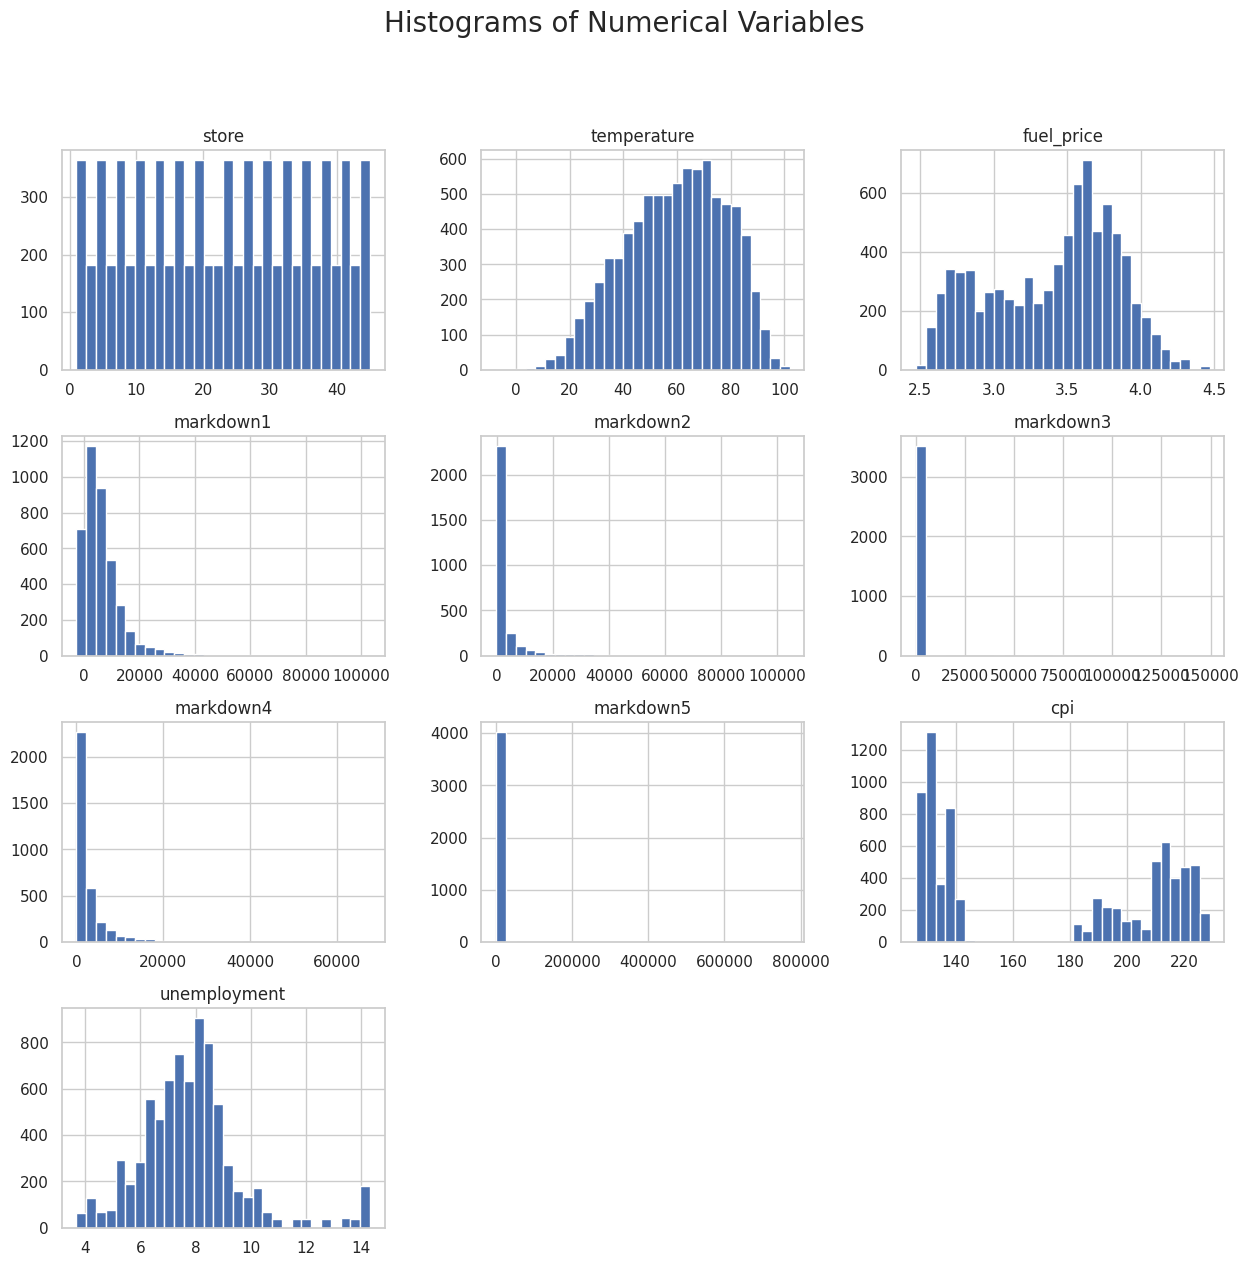

In [29]:
# Setting seaborn plot style
sns.set(style="whitegrid")

# Plotting histograms for numerical variables
df_features.hist(bins=30, figsize=(15, 14))
plt.suptitle('Histograms of Numerical Variables', fontsize=20)
plt.show()

#### Unemployment rate over the period

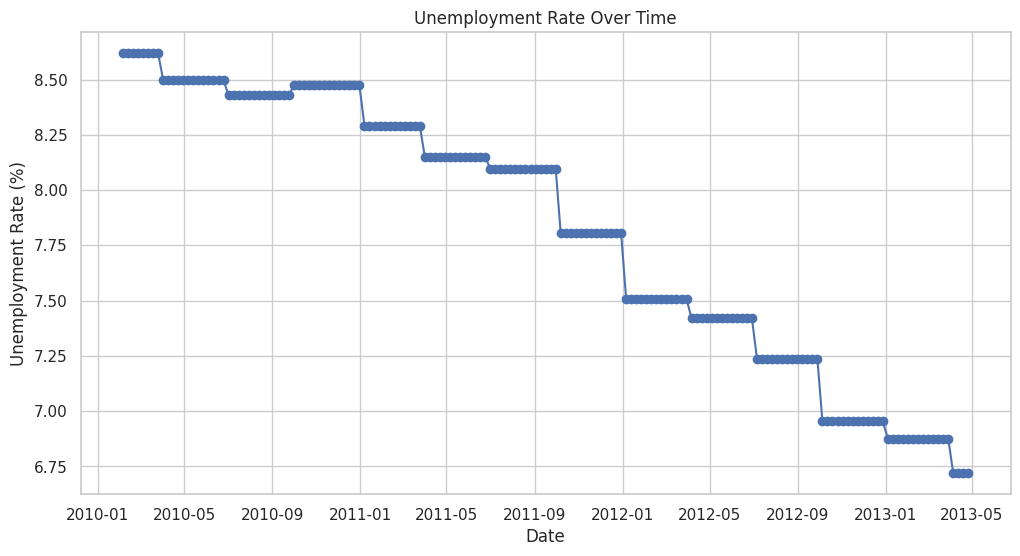

In [30]:
# Convertion of the 'date' column to datetime format
df_features['date'] = pd.to_datetime(df_features['date'])

# Grouping the features data by 'date' and calculating the average unemployment rate
df_grouped = df_features.groupby('date')['unemployment'].mean().reset_index()

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(df_grouped['date'], df_grouped['unemployment'], marker='o', linestyle='-')

# Adding necessary titles and labels
plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')

# Show plot
plt.grid(True)
plt.show()

#### Fuel Price over the period

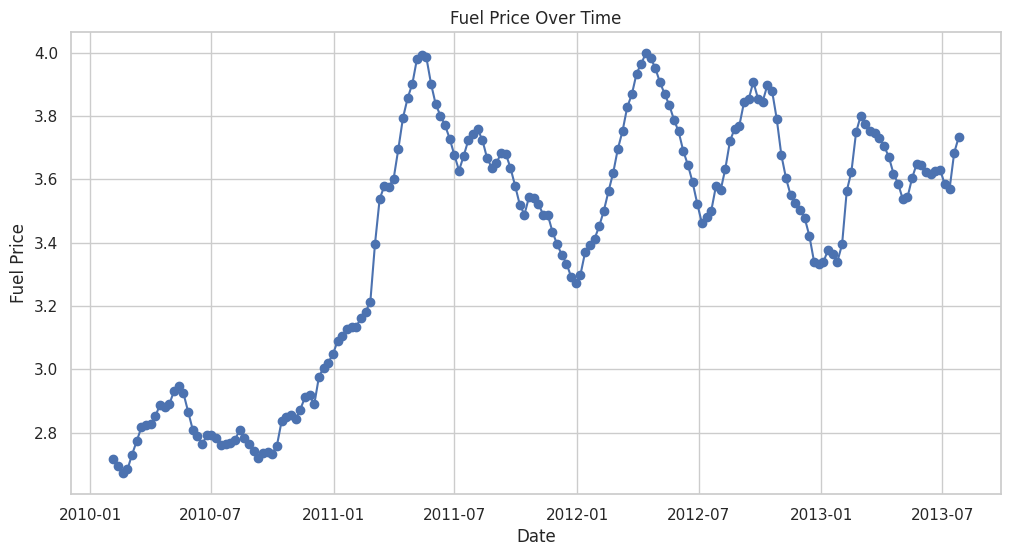

In [31]:
# Grouping of the data by 'Date' and calculating the average Fuel Price
df_grouped_fuel_price = df_features.groupby('date')['fuel_price'].mean().reset_index()

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(df_grouped_fuel_price['date'], df_grouped_fuel_price['fuel_price'], marker='o', linestyle='-')

# Adding necessary titles and labels
plt.title('Fuel Price Over Time')
plt.xlabel('Date')
plt.ylabel('Fuel Price')

# Show plot
plt.grid(True)
plt.show()

#### CPI over the period

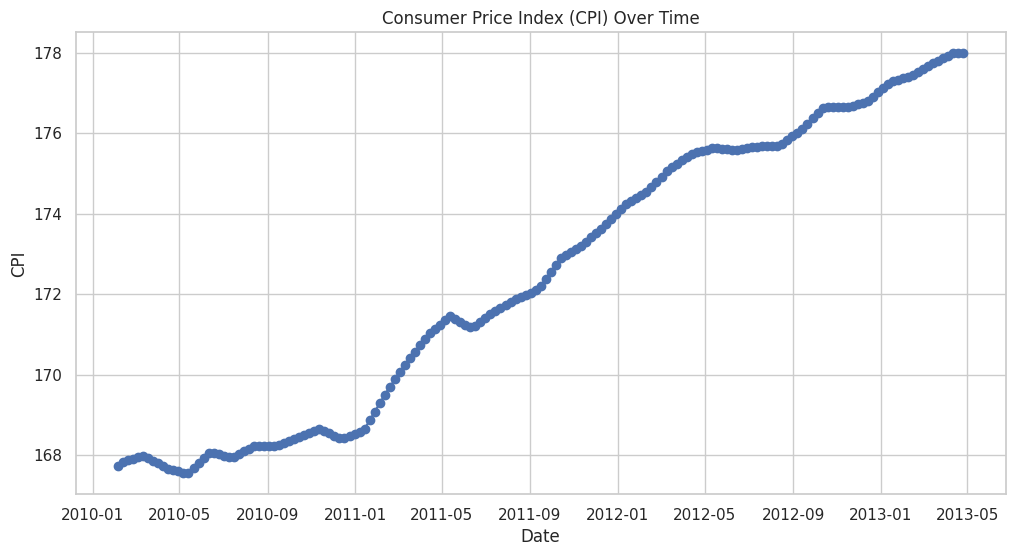

In [32]:
# Grouping of the data by 'Date' and calculating the average CPI
df_grouped_cpi = df_features.groupby('date')['cpi'].mean().reset_index()

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(df_grouped_cpi['date'], df_grouped_cpi['cpi'], marker='o', linestyle='-')

# Adding necessary titles and labels
plt.title('Consumer Price Index (CPI) Over Time')
plt.xlabel('Date')
plt.ylabel('CPI')

# Show plot
plt.grid(True)
plt.show()

#### Percentage of Holidays

<Axes: >

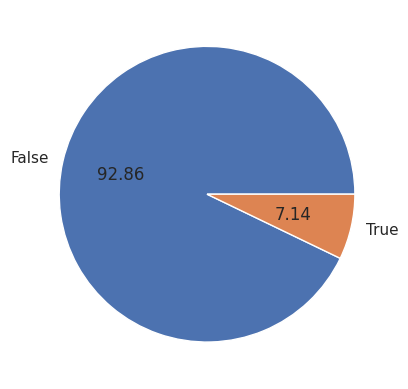

In [34]:
df_features.groupby('isholiday').size().plot(kind='pie', autopct='%.2f')

#### Normalized comparision of Unemployment Rate against CPI and Fuel Price

Normalization

In [35]:
# Grouping of the data by 'Date' and calculating the average for each metric
df_grouped = df_features.groupby('date').mean().reset_index()

# Normalization the data
df_grouped['Unemployment_norm'] = (df_grouped['unemployment'] - df_grouped['unemployment'].min()) / (df_grouped['unemployment'].max() - df_grouped['unemployment'].min())
df_grouped['CPI_norm'] = (df_grouped['cpi'] - df_grouped['cpi'].min()) / (df_grouped['cpi'].max() - df_grouped['cpi'].min())
df_grouped['Fuel_Price_norm'] = (df_grouped['fuel_price'] - df_grouped['fuel_price'].min()) / (df_grouped['fuel_price'].max() - df_grouped['fuel_price'].min())

Graph showcasing the normalized data

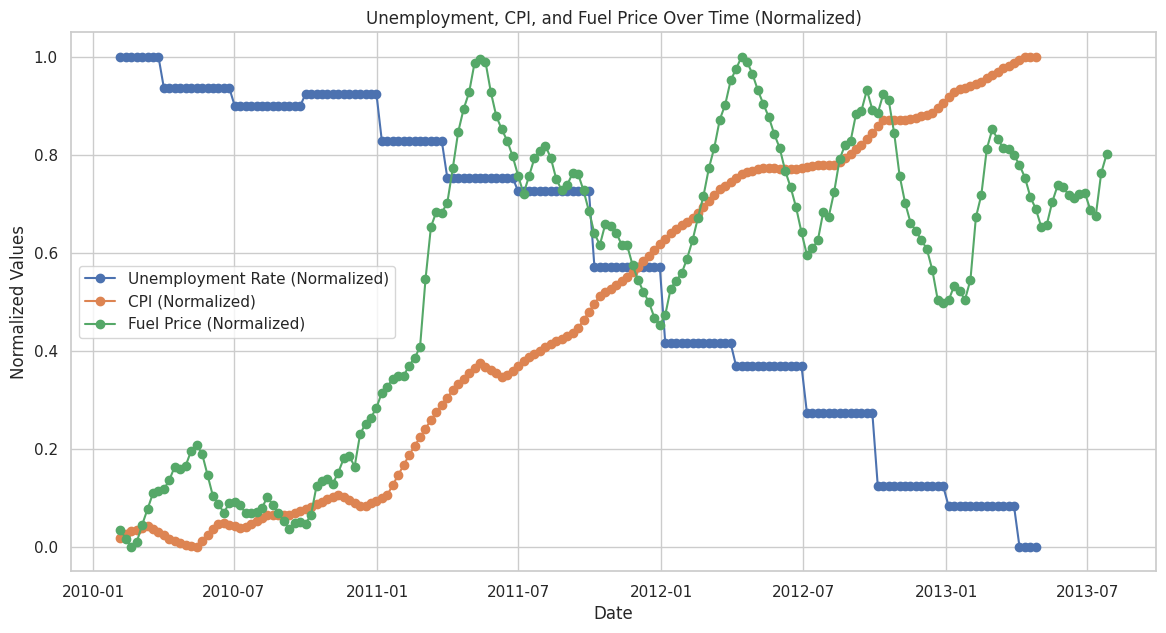

In [36]:
# Plotting the data
plt.figure(figsize=(14, 7))

# Line plot of each normalized metric
plt.plot(df_grouped['date'], df_grouped['Unemployment_norm'], marker='o', linestyle='-', label='Unemployment Rate (Normalized)')
plt.plot(df_grouped['date'], df_grouped['CPI_norm'], marker='o', linestyle='-', label='CPI (Normalized)')
plt.plot(df_grouped['date'], df_grouped['Fuel_Price_norm'], marker='o', linestyle='-', label='Fuel Price (Normalized)')

# Adding necessary titles and labels
plt.title('Unemployment, CPI, and Fuel Price Over Time (Normalized)')
plt.xlabel('Date')
plt.ylabel('Normalized Values')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

#### Store size by type of store

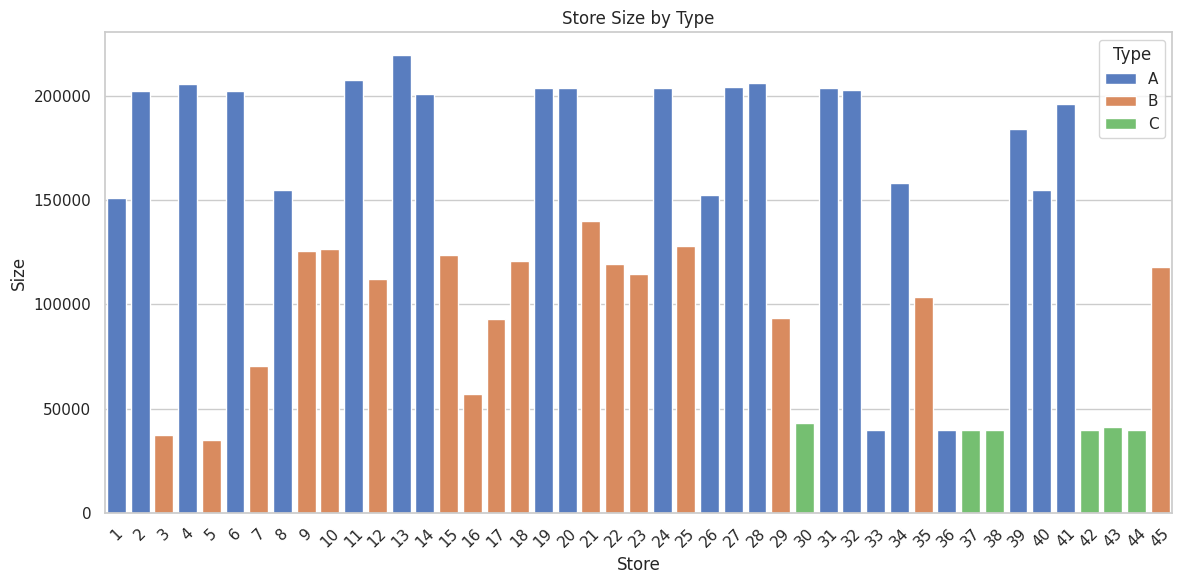

In [37]:
# Plotting the data
plt.figure(figsize=(12, 6))

# Bar plot of the sizes of the type and stores 
sns.barplot(x="store", y="size", hue="type", data=df_store, palette="muted")

# Adding relevant titles and labels
plt.title("Store Size by Type")
plt.xlabel("Store")
plt.ylabel("Size")
plt.xticks(rotation=45)
plt.legend(title="Type")

# Show plot
plt.tight_layout()
plt.show()

### Data Preprocessing

In [38]:
# filling missing values
df_features['cpi'].fillna(df_features['cpi'].median(),inplace=True)
df_features['unemployment'].fillna(df_features['unemployment'].median(),inplace=True)

# Replacing the markdown values with 0
# There are no information on how these values are obtained and what they actually mean in the dataset
for i in range(1, 6):
    df_features["markdown" + str(i)] = df_features["markdown" + str(i)].apply(lambda x: 0 if x < 0 else x)
    df_features["markdown" + str(i)].fillna(value=0, inplace=True)

In [39]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   store         8190 non-null   int64         
 1   date          8190 non-null   datetime64[ns]
 2   temperature   8190 non-null   float64       
 3   fuel_price    8190 non-null   float64       
 4   markdown1     8190 non-null   float64       
 5   markdown2     8190 non-null   float64       
 6   markdown3     8190 non-null   float64       
 7   markdown4     8190 non-null   float64       
 8   markdown5     8190 non-null   float64       
 9   cpi           8190 non-null   float64       
 10  unemployment  8190 non-null   float64       
 11  isholiday     8190 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(9), int64(1)
memory usage: 712.0 KB


### Merging DataFrames

In [40]:
df_features.head()

,store,date,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,isholiday
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False


### Ensuring Consistency in merged dataframe

In [54]:
# Convert date columns to datetime if they are not already
df_features['date'] = pd.to_datetime(df_features['date'])
df_train['date'] = pd.to_datetime(df_train['date'])

# Convert store columns to string to ensure consistency
df_features['store'] = df_features['store'].astype(int)
df_train['store'] = df_train['store'].astype(int)
df_store['store'] = df_store['store'].astype(int)

In [55]:
# Merge df_features with df_train on 'store' and 'date'
merged_df = pd.merge(df_features, df_train, on=['store', 'date'], how='inner')

# Merge the result with df_stores on 'store' only
final_merged_df = pd.merge(merged_df, df_store, on='store', how='inner')

In [56]:
final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   store         421570 non-null  int64         
 1   date          421570 non-null  datetime64[ns]
 2   temperature   421570 non-null  float64       
 3   fuel_price    421570 non-null  float64       
 4   markdown1     421570 non-null  float64       
 5   markdown2     421570 non-null  float64       
 6   markdown3     421570 non-null  float64       
 7   markdown4     421570 non-null  float64       
 8   markdown5     421570 non-null  float64       
 9   cpi           421570 non-null  float64       
 10  unemployment  421570 non-null  float64       
 11  isholiday_x   421570 non-null  bool          
 12  dept          421570 non-null  int64         
 13  weekly_sales  421570 non-null  float64       
 14  isholiday_y   421570 non-null  bool          
 15  type          421

In [57]:
#checking whether the column IsHoliday_x and IsHoliday_y are same or not
final_merged_df['isholiday_x'].isin(final_merged_df['isholiday_y']).all()

np.True_

In [58]:
final_merged_df['date'] = pd.to_datetime(final_merged_df['date'])
# Extract year, month, and ISO week
final_merged_df['year'] = final_merged_df['date'].dt.year
final_merged_df['month'] = final_merged_df['date'].dt.month
final_merged_df['iso_week'] = final_merged_df['date'].dt.isocalendar().week
final_merged_df.sort_values(by=['date','store','dept'],inplace=True)